In [23]:
from configure_dataframes import directory_to_dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
df = directory_to_dataframe("data")

In [14]:
df

,label,start_time,file_path,instrument,burst_type
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2
1,burst,2023-02-20 15:09:00,data/2/2023-02-20 15-09-00_2023-02-20 15-10-00...,humain_59,2
2,burst,2022-05-19 12:09:00,data/2/2022-05-19 12-09-00_2022-05-19 12-10-00...,humain_59,2
3,burst,2022-05-28 16:03:00,data/2/2022-05-28 16-03-00_2022-05-28 16-04-00...,humain_59,2
4,burst,2022-03-28 11:32:00,data/2/2022-03-28 11-32-00_2022-03-28 11-33-00...,humain_59,2
...,...,...,...,...,...
115682,no_burst,2023-04-06 21:23:00,data/no_burst/2023-04-06 21-23-00_2023-04-06 2...,australia_assa_62,no_burst
115683,no_burst,2021-11-03 21:40:00,data/no_burst/2021-11-03 21-40-00_2021-11-03 2...,australia_assa_01,no_burst
115684,no_burst,2022-10-23 19:45:00,data/no_burst/2022-10-23 19-45-00_2022-10-23 1...,alaska_haarp_62,no_burst
115685,no_burst,2021-08-09 03:03:00,data/no_burst/2021-08-09 03-03-00_2021-08-09 0...,australia_assa_02,no_burst


In [4]:
to_check = [
    "australia_assa_02",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
]
to_check = ["alaska_haarp_62"]

In [5]:
df = df[df.instrument.isin(to_check)]
df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)

In [6]:
df

,label,start_time,file_path,instrument,burst_type,is_burst
0,burst,2022-03-31 18:46:00,data/2/2022-03-31 18-46-00_2022-03-31 18-47-00...,alaska_haarp_62,2,1
7,burst,2022-07-04 13:47:00,data/2/2022-07-04 13-47-00_2022-07-04 13-48-00...,alaska_haarp_62,2,1
8,burst,2022-05-11 18:45:00,data/2/2022-05-11 18-45-00_2022-05-11 18-46-00...,alaska_haarp_62,2,1
19,burst,2023-06-20 17:09:00,data/2/2023-06-20 17-09-00_2023-06-20 17-10-00...,alaska_haarp_62,2,1
20,burst,2022-03-30 17:42:00,data/2/2022-03-30 17-42-00_2022-03-30 17-43-00...,alaska_haarp_62,2,1
...,...,...,...,...,...,...
120749,no_burst,2023-03-02 00:31:00,data/no_burst/2023-03-02 00-31-00_2023-03-02 0...,alaska_haarp_62,no_burst,0
120752,no_burst,2022-05-15 03:02:00,data/no_burst/2022-05-15 03-02-00_2022-05-15 0...,alaska_haarp_62,no_burst,0
120757,no_burst,2022-03-09 01:17:00,data/no_burst/2022-03-09 01-17-00_2022-03-09 0...,alaska_haarp_62,no_burst,0
120758,no_burst,2022-07-22 04:00:00,data/no_burst/2022-07-22 04-00-00_2022-07-22 0...,alaska_haarp_62,no_burst,0


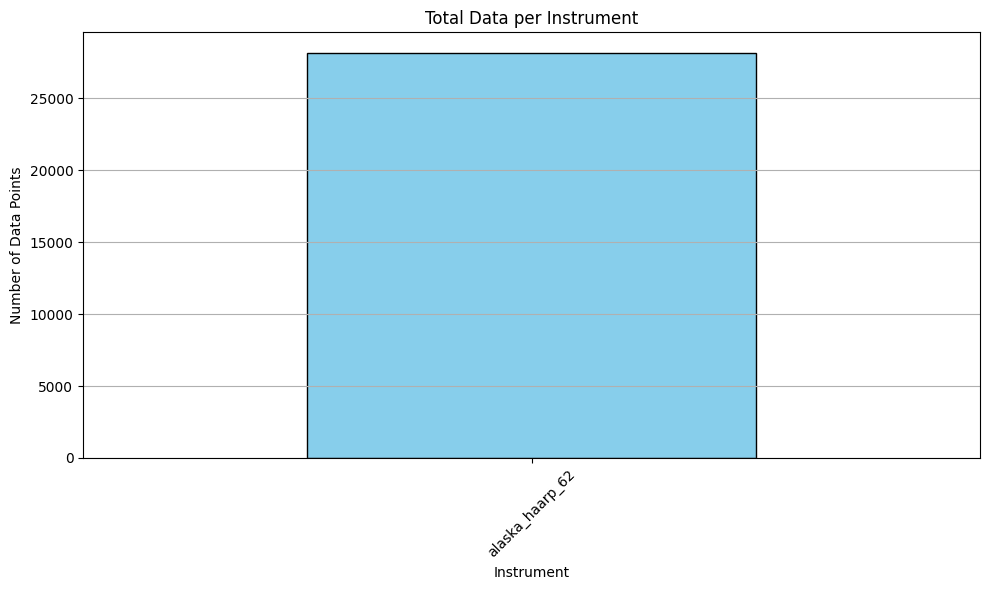

In [7]:
plt.figure(figsize=(10, 6))
df["instrument"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Data per Instrument")
plt.xlabel("Instrument")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

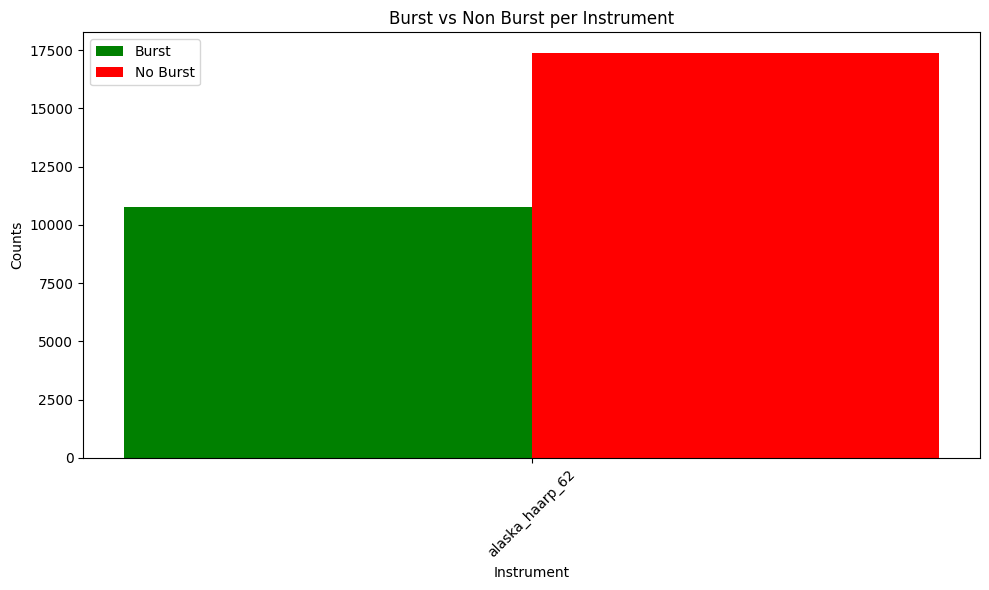

In [8]:
burst_counts = df.groupby("instrument")["is_burst"].sum()
total_counts = df["instrument"].value_counts()
no_burst_counts = total_counts - burst_counts

bar_width = 0.35
indices = range(len(burst_counts))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(indices, burst_counts, bar_width, label="Burst", color="green")
bar2 = plt.bar(
    [i + bar_width for i in indices],
    no_burst_counts,
    bar_width,
    label="No Burst",
    color="red",
)

plt.xlabel("Instrument")
plt.ylabel("Counts")
plt.title("Burst vs Non Burst per Instrument")
plt.xticks([i + bar_width / 2 for i in indices], burst_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

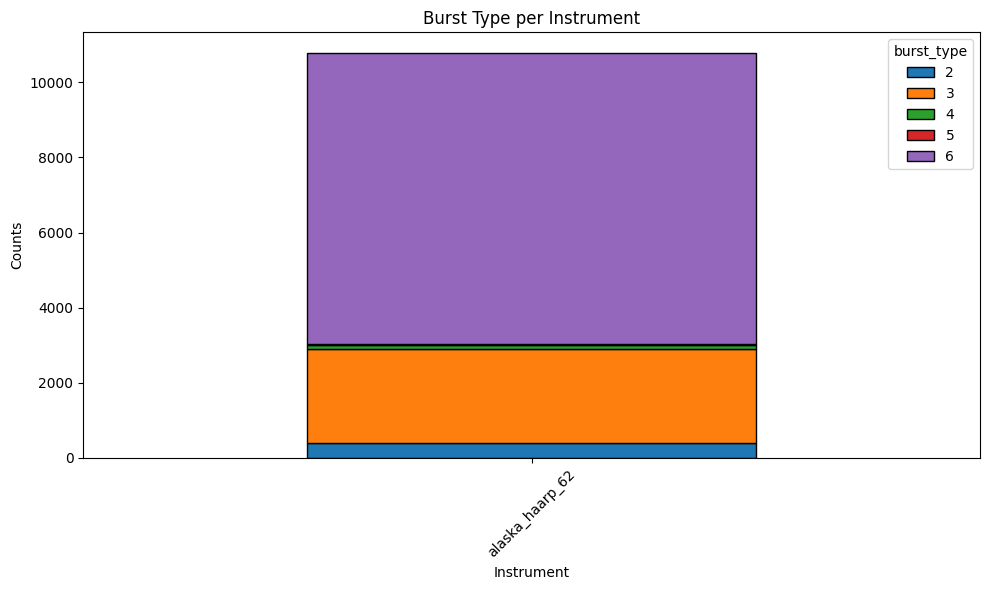

In [9]:
# Assuming that the 'burst_type' column is added to your DataFrame:
burst_type_counts = (
    df[df["is_burst"] == 1]
    .groupby(["instrument", "burst_type"])
    .size()
    .unstack()
    .fillna(0)
)

burst_type_counts.plot(kind="bar", stacked=True, figsize=(10, 6), edgecolor="black")
plt.title("Burst Type per Instrument")
plt.xlabel("Instrument")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

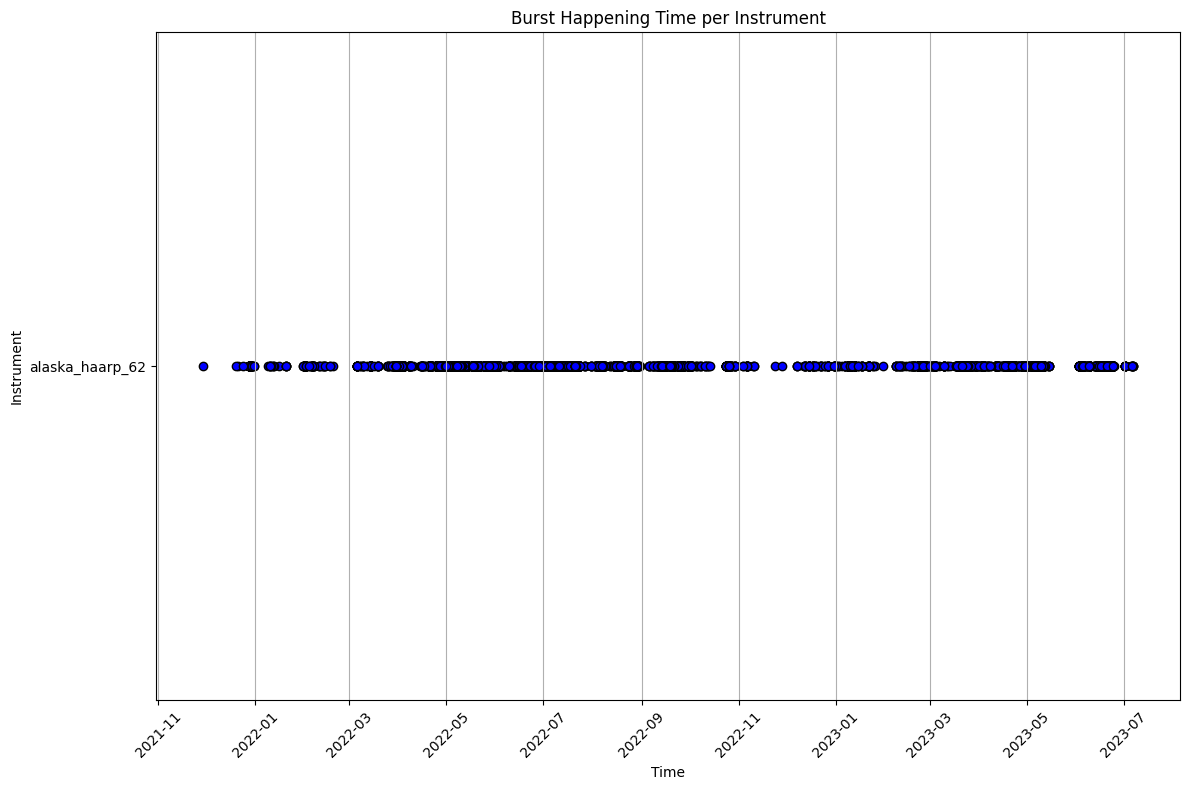

In [10]:
# Converting the 'start_time' to datetime
df["start_time"] = pd.to_datetime(df["start_time"])

# Selecting only the rows where a burst occurred
burst_data = df[df["is_burst"] == 1]

plt.figure(figsize=(12, 8))
plt.scatter(
    burst_data["start_time"], burst_data["instrument"], c="blue", edgecolor="black"
)

plt.title("Burst Happening Time per Instrument")
plt.xlabel("Time")
plt.ylabel("Instrument")
plt.xticks(rotation=45)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

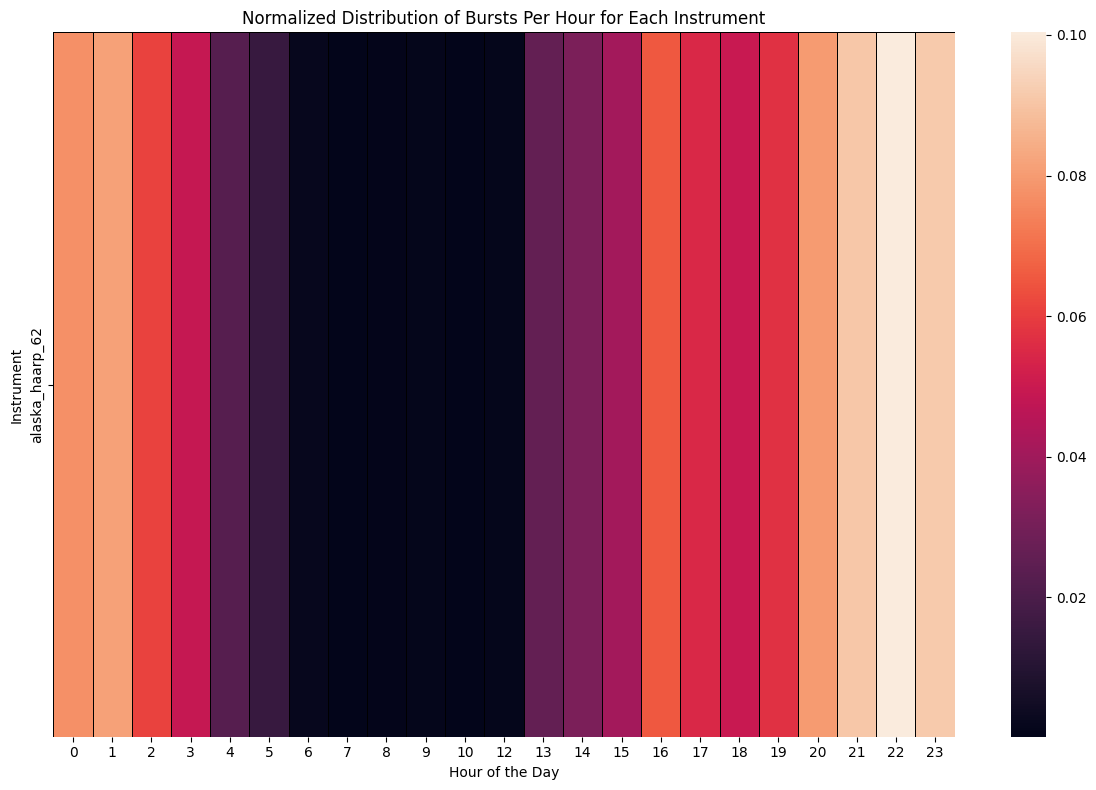

In [11]:
import seaborn as sns

# Extract the hour from the 'start_time' column
df["hour"] = df["start_time"].dt.hour

# Pivot the data to get a matrix with the count of bursts per instrument per hour
burst_hour_matrix = (
    df[df["is_burst"] == 1]
    .pivot_table(
        index="instrument", columns="hour", values="start_time", aggfunc="count"
    )
    .fillna(0)
)

# Normalize the matrix per instrument
burst_hour_matrix_normalized = burst_hour_matrix.div(
    burst_hour_matrix.sum(axis=1), axis=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    burst_hour_matrix_normalized,
    cbar=True,
    linewidths=0.5,
    linecolor="black",
    # cmap="plasma"
)

plt.title("Normalized Distribution of Bursts Per Hour for Each Instrument")
plt.xlabel("Hour of the Day")
plt.ylabel("Instrument")
plt.tight_layout()
plt.show()

In [12]:
df.instrument.value_counts()

instrument
alaska_haarp_62    28188
Name: count, dtype: int64

In [119]:
images_burst_df = []
df_burst = df[df['label'] == 'burst'].sample(1000)
for idx, row in df_burst.iterrows():
    img = pd.DataFrame(np.array(Image.open(row['file_path']).convert('L'))).T
    images_burst_df.append(img)

In [120]:
images_non_burst_df = []
df_non_burst = df[df['label'] == 'no_burst'].sample(1000)
for idx, row in df_non_burst.iterrows():
    img = pd.DataFrame(np.array(Image.open(row['file_path']).convert('L'))).T
    images_non_burst_df.append(img)

In [163]:
def calculate_statistics(list_of_df_images):
    """
    Calculates some stastics over time for the given list of images."""
    statistics = {'mean': [], 'std': [], 'min': [], 'max': [], 'sum': [], 'max_min': [], 'qqsum': []}
    for image in list_of_df_images:
        mean, std, min, max, sum = image.mean().sum(), image.std().sum(), image.min().sum(), image.max().sum(), image.sum().sum()
        max_min = image.max() - image.min()
        max_min = max_min.sum()

        # quantile - quantile sum
        qq = image.quantile(0.95) - image.quantile(0.05)
        qq = qq.sum()

        statistics['mean'].append(mean)
        statistics['std'].append(std)
        statistics['min'].append(min)
        statistics['max'].append(max)
        statistics['sum'].append(sum)
        statistics['max_min'].append(max_min)
        statistics['qqsum'].append(qq)

    return statistics

In [164]:
stats_burst = calculate_statistics(images_burst_df)

In [165]:
stats_non_burst = calculate_statistics(images_non_burst_df)

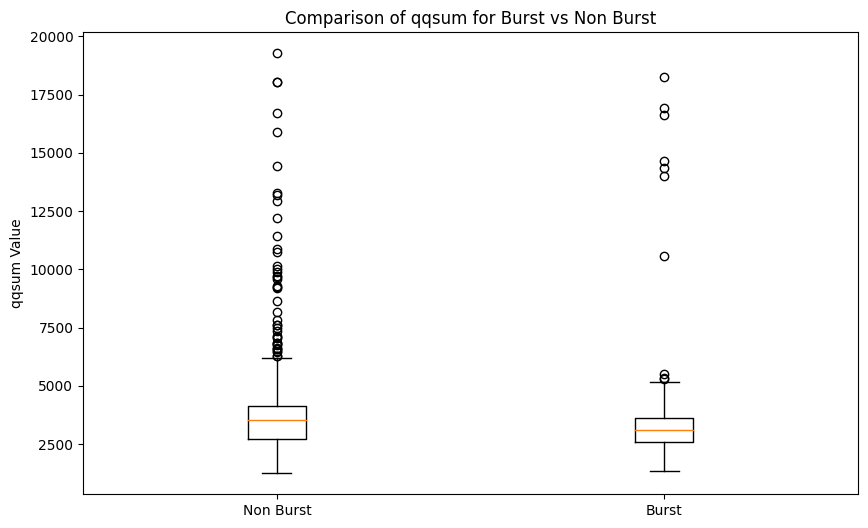

In [166]:
# Boxplot for Mean
data = [stats_burst['qqsum'], stats_non_burst['qqsum']]
labels = ['Non Burst', 'Burst']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Comparison of qqsum for Burst vs Non Burst')
plt.ylabel('qqsum Value')
plt.show()

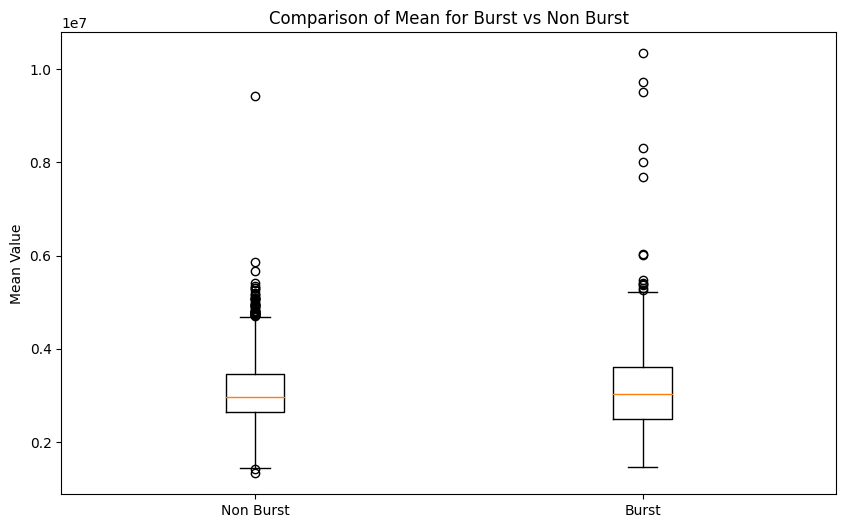

In [155]:
# Boxplot for Mean
data = [stats_burst['sum'], stats_non_burst['sum']]
labels = ['Non Burst', 'Burst']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Comparison of Mean for Burst vs Non Burst')
plt.ylabel('Mean Value')
plt.show()

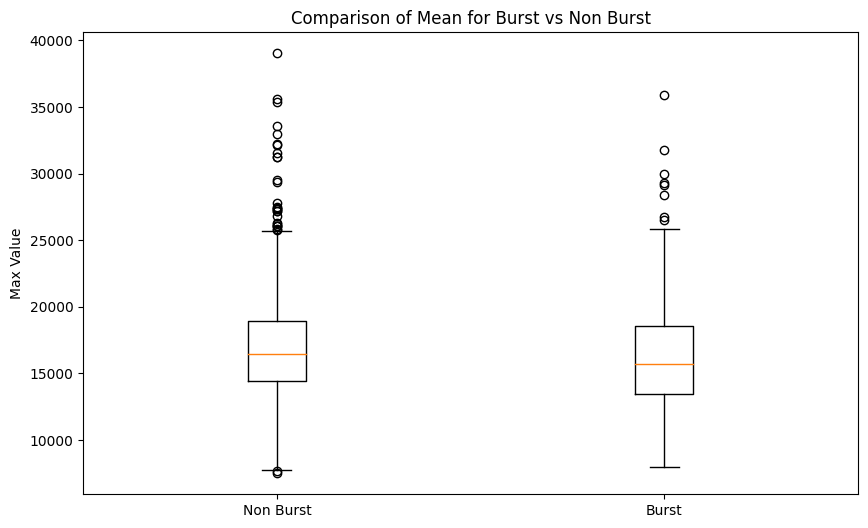

In [156]:
# Boxplot for Mean
data = [stats_burst['max'], stats_non_burst['max']]
labels = ['Non Burst', 'Burst']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Comparison of Mean for Burst vs Non Burst')
plt.ylabel('Max Value')
plt.show()

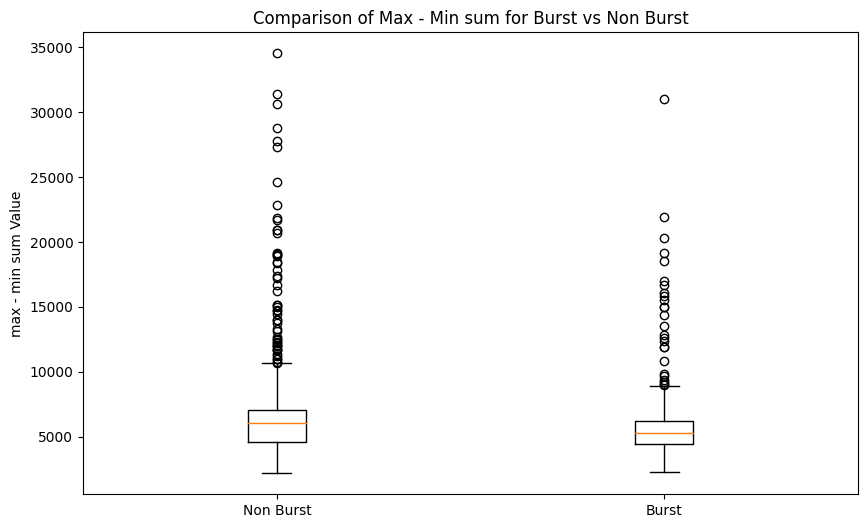

In [157]:
# Boxplot for Mean
data = [stats_burst['max_min'], stats_non_burst['max_min']]
labels = ['Non Burst', 'Burst']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Comparison of Max - Min sum for Burst vs Non Burst')
plt.ylabel('max - min sum Value')
plt.show()

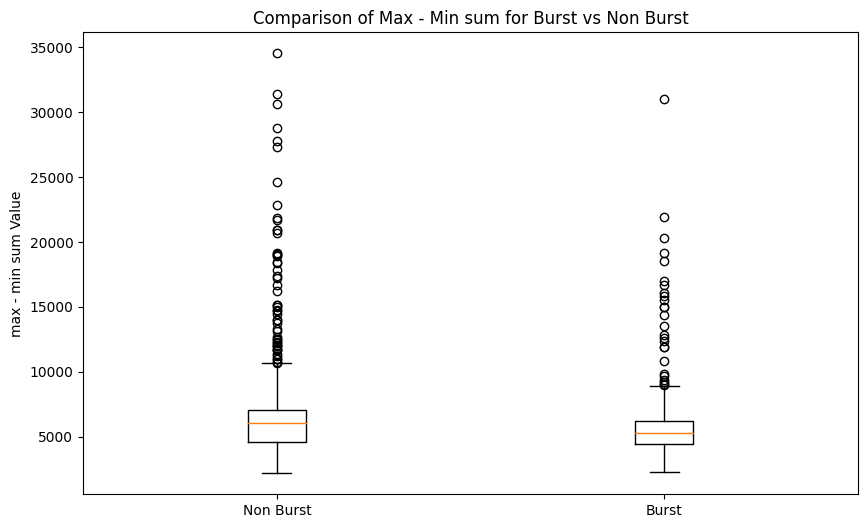

In [158]:
# Boxplot for Mean
data = [stats_burst['max_min'], stats_non_burst['max_min']]
labels = ['Non Burst', 'Burst']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('Comparison of Max - Min sum for Burst vs Non Burst')
plt.ylabel('max - min sum Value')
plt.show()